<a href="https://colab.research.google.com/github/ikhwanperwira/run-once-ipynb/blob/main/run_once_cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Register Magic Cell: `run_once`
from IPython.core.magic import register_cell_magic
from IPython.display import display, HTML
from google.colab import output as __output
import hashlib
import time
import os

@register_cell_magic
def run_once(__line: str, __cell: str):
  """
  This custom cell magic command ensures that the notebook cell runs only once during the runtime or even the lifetime.
  If the cell has already been executed before with identical code, it will display the previous output, saving time by avoiding redundant computations.
  Usage: %%run_once <tracker_directory: ./.run_once>
  """
  try:

    # Argument of this magic cell is specifying tracker directory.
    __tracker_dir = __line
    if len(__tracker_dir) == 0:
      __tracker_dir = '.run_once' # Set default if not specified.

    # Create tracker directory.
    if not os.path.exists(__tracker_dir):
      os.makedirs(__tracker_dir)

    # Get cell ID by cell changes with SHA-1 as an identifier.
    __cell_id = hashlib.sha1(__cell.encode('utf-8')).hexdigest()

    # Check whether __cell_id.html already exists. (Imply the cell already runs)
    if os.path.exists(f'{__tracker_dir}/{__cell_id}.html'):
      with open(f'{__tracker_dir}/{__cell_id}.html', 'r') as __file_cell_output:
        __html_output = __file_cell_output.read()
      __last_created = time.strftime('%Y-%m-%d %H:%M:%S UTC+00', time.gmtime(os.path.getctime(f'{__tracker_dir}/{__cell_id}.html')))
      print(f'This cell ({__cell_id}) already ran before, the last run was ', __last_created, ', displaying history output...\n', sep='')
      display(HTML(__html_output))
      return # Don't do any computations.

    # Actual compute
    get_ipython().run_cell(__cell)

    # After the code has been executed, it will contain some output. Save it!
    __html_output = __output.eval_js('document.getElementById("output-area").innerHTML;')
    with open(f'{__tracker_dir}/{__cell_id}.html', 'w') as __file_cell_output:
      __file_cell_output.write(__html_output)

    # Also, save the cell code for archive purposes.
    with open(f'{__tracker_dir}/{__cell_id}.cell.py', 'w') as __file_cell_input:
      __file_cell_input.write(__cell)

    # Notify where the history is saved.
    print(f'\nThe cell code and output history pair have been saved at {__tracker_dir}/{__cell_id}')

  except Exception as e:
    print(f"run_once error: {str(e)}")

In [2]:
#@title This is the first run.
%%run_once

print("Be careful. This is a long computation. This is an example of a cell that shouldn't be called multiple times.")

Be careful. This is a long computation. This is an example of a cell that shouldn't be called multiple times.

The cell code and output history pair have been saved at .run_once/8896866b6dbe919e7d4baec5f9c5c45a5065f6ce


In [3]:
#@title This is the second run.
%%run_once

print("Be careful. This is a long computation. This is an example of a cell that shouldn't be called multiple times.")

This cell (8896866b6dbe919e7d4baec5f9c5c45a5065f6ce) already ran before, the last run was 2024-05-18 01:11:26 UTC+00, displaying history output...



In [4]:
!cat /content/.run_once/8896866b6dbe919e7d4baec5f9c5c45a5065f6ce.cell.py
!echo
!cat /content/.run_once/8896866b6dbe919e7d4baec5f9c5c45a5065f6ce.html


print("Be careful. This is a long computation. This is an example of a cell that shouldn't be called multiple times.")

<span id="output-header"> </span><div id="output-body"></div><span id="output-footer"></span>

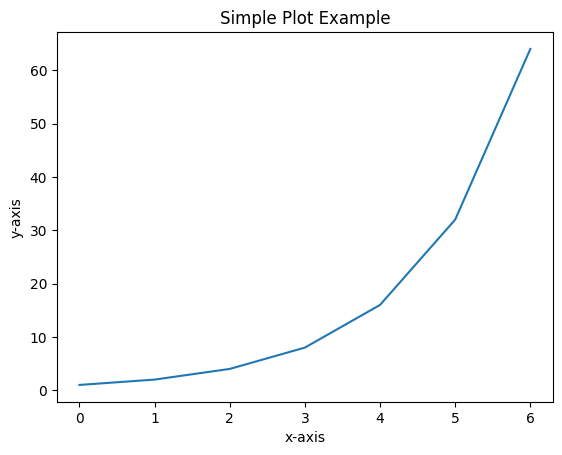


The cell code and output history pair have been saved at .run_once/b5f704df4e623b3f7bea4d815ac35e2cb49e9814


In [5]:
#@title First Run Matplotlib
%%run_once
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 8, 16, 32, 64])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Simple Plot Example')
plt.show()

This cell (b5f704df4e623b3f7bea4d815ac35e2cb49e9814) already ran before, the last run was 2024-05-18 01:11:40 UTC+00, displaying history output...




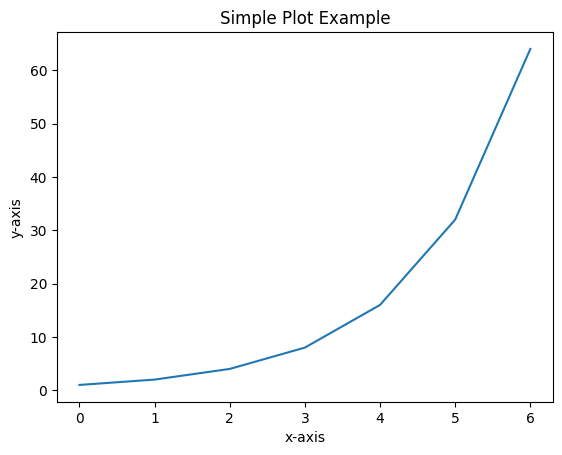

In [6]:
#@title Second Run Matplotlib
%%run_once
import matplotlib.pyplot as plt

plt.plot([1, 2, 4, 8, 16, 32, 64])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Simple Plot Example')
plt.show()

In [7]:
#@title First Run Pandas DataFrame
%%run_once drive/MyDrive/.run_once
import pandas as pd

# Creating a DataFrame from the dictionary
df = pd.DataFrame({
  'Column1': [1, 2, 3],
  'Column2': ['A', 'B', 'C'],
  'Column3': [True, False, True]
})

# Displaying the DataFrame
display(df)

,Column1,Column2,Column3
0,1,A,True
1,2,B,False
2,3,C,True



The cell code and output history pair have been saved at drive/MyDrive/.run_once/92b6c663d535b4f8e56cd3e6701024639ed67bf4


In [8]:
#@title Second Run Pandas DataFrame
%%run_once drive/MyDrive/.run_once
import pandas as pd

# Creating a DataFrame from the dictionary
df = pd.DataFrame({
  'Column1': [1, 2, 3],
  'Column2': ['A', 'B', 'C'],
  'Column3': [True, False, True]
})

# Displaying the DataFrame
display(df)

This cell (92b6c663d535b4f8e56cd3e6701024639ed67bf4) already ran before, the last run was 2024-05-18 01:12:01 UTC+00, displaying history output...



,Column1,Column2,Column3
0,1,A,True
1,2,B,False
2,3,C,True
